# سوال اول

تصویر Airplane را در ورودی خوانده و نمایش دهید. هیستوگرام تصویر را محاسبه نمایید و نمایش دهید. با استفاده از روش 
همسان سازی هیستوگرام، تصویر را نگاشت داده و آن را با تصویر اولیه مقایسه نمایید. مقایسه شامل تصاویر و هیستوگرامهای تصاویر 
در قالب گزارش ارایه شود.

In [1]:
import numpy
import cv2
import matplotlib.pyplot as plt

در بخش زیر تصویر Airplan را میخوانیم و آن را نشان میدهیم

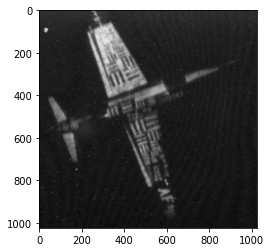

In [2]:
gray_image = cv2.imread("../Airplane.tiff",cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_image , cmap="gray")

حال در این بخش تابعی برای محاسبه هیستوگرام تصویر تعریف میکنیم

In [3]:
def calculateHis(image):
    ypointArray = numpy.zeros(256)

    for x in range (256):
        ypointArray[x] = numpy.count_nonzero(image == x)

    return  ypointArray

حال در قسمت زیر هیستوگرام تصویر اصلی را محاسبه میکنیم

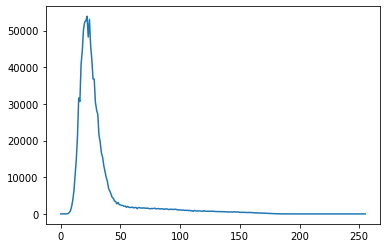

In [4]:
originalHistogram = calculateHis(gray_image)

plt.plot(originalHistogram)
plt.show()

در قسمت بعد هیستوگرام تصیر اصلی را همسان سازی میکنیم و سپس تصویر همسان سازی شده را نشان میدهیم

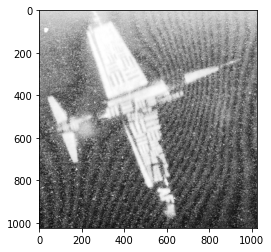

In [5]:
eqImage = cv2.equalizeHist(gray_image)

plt.imshow(eqImage , cmap="gray")

در قسمت بعد هیستوگرام تصویر همسان سازی شده را محاسبه کرده و نمودار آن را نشان میدهیم

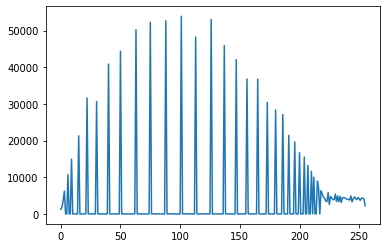

In [6]:
eqImageHistogram = calculateHis(eqImage)

plt.plot(eqImageHistogram)
plt.show()

# نتیجه گیری

در این قسمت دو تصویر ایجاد شده و هیستوگرام آن ها را کنار هم قار میدهیم و بررسی میکنیم

Text(0.5, 1.0, 'equlized histogram')

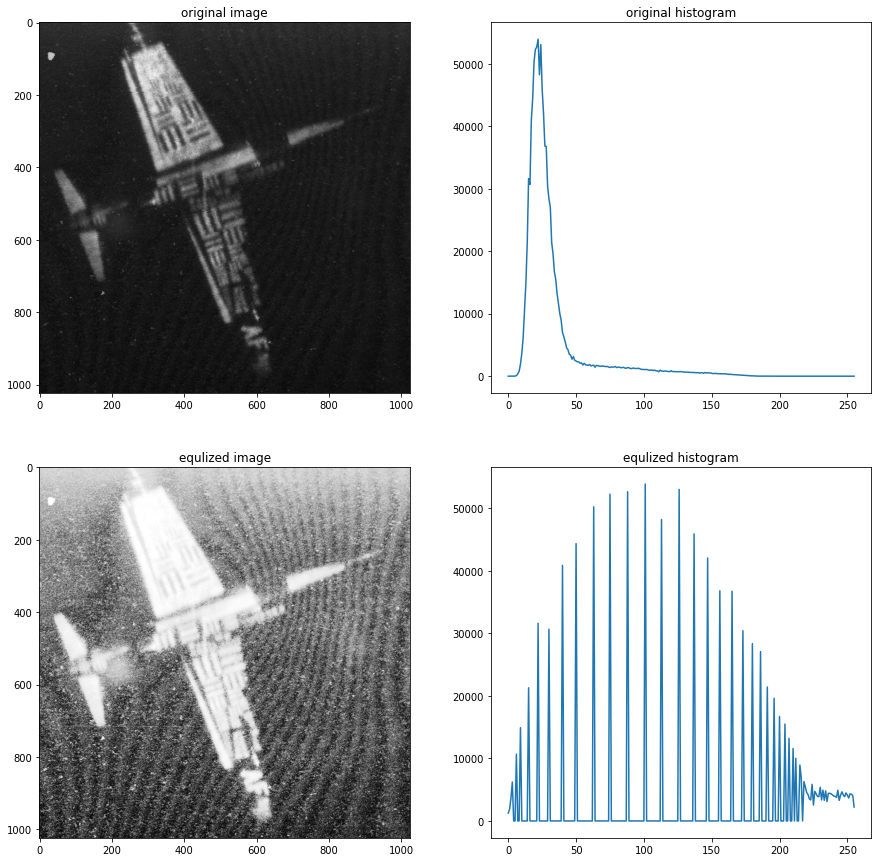

In [7]:
fig , subplot = plt.subplots(2 , 2 , figsize=(15, 15))

subplot[0][0].imshow(gray_image , cmap = "gray")
subplot[0][0].set_title("original image")

subplot[0][1].plot(originalHistogram)
subplot[0][1].set_title("original histogram")

subplot[1][0].imshow(eqImage , cmap = "gray")
subplot[1][0].set_title("equlized image")

subplot[1][1].plot(eqImageHistogram)
subplot[1][1].set_title("equlized histogram")

با دقت در تصویر اول و هیستوگرام آن متوجه میشویم که اکثر روشنایی تصویر در بخش بین 0 تا 50 قرار گرفته و تیره بودن تصویر نیز این قضیه را تصدیق میکند. اما پس از همسان سازی تصویر با نگاه به تصویر همسان سازی شده میبینیم که تشخیص هواپیمای داخل تصویر اصلی در تصویر همسان سازی شده کمی راحت تر است بدلیل اینکه در فرایند همسان سازی contrast تصویر افزایش پیدا میکند. با نگاه کردن به هیستوگرام تصویر همسان سازی شده متوجه میشویم که هیستوگرام حاصل نسبت به هیستوگرام تصویر اصلی کمی پخش تر شده و دیگر در یک بازه خاص از روشنایی تجمع ندارد. بنابراین میتوان نتیجه گرفت در تکنیک همسان سازی هیستوگرام، contrast تصویر بالا میرود که در نتیجه آن باعث میشود تشخیص اجزای تصویر در تصویر همسان سازی شده راحت تر شود و همینطور نمودار مربوط هیستوگرام آن در یک بازه خاص قرار نگیرد و به توزیع یکنواخت نزدیک تر شود. 